# 1. Import Library

In [21]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # berfungsi untuk mengolah data numerik
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

from IPython.display import display # memunculkan data dalam bentuk tabel
from scipy.optimize import minimize # untuk mengoptimalkan fungsi


# 2. Membaca Dataset

In [22]:
df = pd.read_excel('evaluasi_penyelenggara_diklat_2022.xlsx') # berfungsi untuk membaca file excel
display(df.head()) # berfungsi untuk menampilkan 5 data teratas
display(df.tail()) # berfungsi untuk menampilkan 5 data terbawah

,1,2,3,4,5,6,7,8,9,outcome
0,95,98,98,98,98,85,95,90,1,94.63
1,95,95,100,95,100,100,100,100,1,98.13
2,100,100,100,99,100,100,100,100,1,99.88
3,95,80,95,90,95,95,95,95,1,92.50
4,100,100,100,100,100,100,100,100,1,100.00


,1,2,3,4,5,6,7,8,9,outcome
62,80,89,90,100,100,80,89,100,3,91.00
63,99,99,99,99,99,99,99,99,3,99.00
64,100,95,100,100,100,100,100,100,3,99.38
65,99,99,95,99,99,99,99,100,3,98.63
66,99,99,99,99,99,99,99,99,3,99.00


In [23]:
df.describe() # berfungsi untuk menampilkan deskripsi data

,1,2,3,4,5,6,7,8,9,outcome
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,93.104478,93.104478,93.134328,94.402985,93.597015,92.208955,92.731343,93.179104,1.985075,93.184328
std,7.532021,7.330167,7.141207,6.322302,7.551961,7.894258,8.316800,7.288275,0.861509,6.663348
min,69.000000,69.000000,69.000000,80.000000,69.000000,69.000000,69.000000,69.000000,1.000000,72.880000
25%,90.000000,90.000000,90.000000,90.000000,90.000000,86.500000,90.000000,90.000000,1.000000,90.000000
50%,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,2.000000,94.500000
75%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,3.000000,99.190000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,3.000000,100.000000


In [24]:
# Menampilkan data yang memiliki nilai null

df.isnull().sum() # berfungsi untuk menampilkan jumlah data yang memiliki nilai null
print(len(df)) # berfungsi untuk menampilkan jumlah data

67


# 3. Data Preprocessing

In [25]:
# Memisahkan data menjadi 2 bagian yaitu X dan y atau data feature dan data target (outcome)

X = df.drop([9, 'outcome'], axis=1) # berfungsi untuk memisahkan data feature
y = df['outcome'] # berfungsi untuk memisahkan data target

display(X) # berfungsi untuk menampilkan data feature
display(pd.DataFrame(y)) # berfungsi untuk menampilkan data target

,1,2,3,4,5,6,7,8
0,95,98,98,98,98,85,95,90
1,95,95,100,95,100,100,100,100
2,100,100,100,99,100,100,100,100
3,95,80,95,90,95,95,95,95
4,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...
62,80,89,90,100,100,80,89,100
63,99,99,99,99,99,99,99,99
64,100,95,100,100,100,100,100,100
65,99,99,95,99,99,99,99,100


,outcome
0,94.63
1,98.13
2,99.88
3,92.50
4,100.00
...,...
62,91.00
63,99.00
64,99.38
65,98.63


In [26]:
# sns.pairplot(df, hue='outcome') # berfungsi untuk menampilkan pair plot dari data feature dan data target (outcome)

# 4. Modelling

In [27]:
xm1 = np.array(X[1]) # berfungsi untuk mengubah data feature menjadi array untuk Efektifitas penyelenggara
xm2 = np.array(X[2]) # berfungsi untuk mengubah data feature menjadi array untuk Kesiapan dan kesediaan sarana diklat
xm3 = np.array(X[3]) # berfungsi untuk mengubah data feature menjadi array untuk Kesesuaian Pelaksanaan Program Dengan Rencana
xm4 = np.array(X[4]) # berfungsi untuk mengubah data feature menjadi array untuk Kebersihan kelas, asrama, kafetaria, toilet dll
xm5 = np.array(X[5]) # berfungsi untuk mengubah data feature menjadi array untuk Ketersediaan dan kelengkapan bahan diklat
xm6 = np.array(X[6]) # berfungsi untuk mengubah data feature menjadi array untuk Ketersediaan fasilitas olahraga, kesehatan dan ibadah
xm7 = np.array(X[7]) # berfungsi untuk mengubah data feature menjadi array untuk Pelayanan terhadap peserta dan widyaiswara								
xm8 = np.array(X[8]) # berfungsi untuk mengubah data feature menjadi array untuk Administrasi diklat
ym = y # berfungsi untuk mengubah data target menjadi array sebagai evaluasi keseluruhan penyelenggara diklat



In [28]:
def calc_y(x): # berfungsi untuk menghitung nilai y
    a = x[0] # berfungsi untuk mengambil nilai x pada indeks ke 0
    b = x[1] # berfungsi untuk mengambil nilai x pada indeks ke 1
    c = x[2] # berfungsi untuk mengambil nilai x pada indeks ke 2
    d = x[3] # berfungsi untuk mengambil nilai x pada indeks ke 3
    e = x[4] # berfungsi untuk mengambil nilai x pada indeks ke 4
    f = x[5] # berfungsi untuk mengambil nilai x pada indeks ke 5
    g = x[6] # berfungsi untuk mengambil nilai x pada indeks ke 6
    h = x[7] # berfungsi untuk mengambil nilai x pada indeks ke 7
    i = x[8] # berfungsi untuk mengambil nilai x pada indeks ke 8
    y = a * ( xm1 ** b ) * ( xm2 ** c ) * ( xm3 ** d ) * ( xm4 ** e ) * ( xm5 ** f ) * ( xm6 ** g ) * ( xm7 ** h ) * ( xm8 ** i ) # NON LINEAR - MODEL SATU
    # y = a + ( (b*xm1)) + ( (c*xm2) ** 2 ) + ( (d*xm3) ** 3 ) + ( (e*xm4) ** 4 ) + ( (f*xm5) ** 5 ) + ( (g*xm6) ** 6 ) + ( (h*xm7) ** 7 ) + ((i*xm8) ** 8 ) # NON LINEAR - MODEL DUA
    return y # berfungsi untuk mengembalikan nilai y


In [29]:
def objective(x): # berfungsi untuk menghitung objective
    y = calc_y(x) # berfungsi untuk menghitung nilai y
    obj = 0.0 # menginisialisasi nilai obj
    for i in range(len(ym)): 
        obj = obj + ((y[i]-ym[i])/ym[i])**2 # berfungsi untuk menghitung nilai obj
    return obj # berfungsi untuk mengembalikan nilai obj

In [30]:
x0 = np.zeros(9) # berfungsi untuk menginisialisasi nilai x0
for i in range(len(x0)): # berfungsi untuk menghitung nilai x0
    x0[i] = 0 # menginisialisasi nilai x0

In [31]:
print('Initial Objective: ' + str(objective(x0))) # berfungsi untuk menampilkan nilai objek awal

my_bnds = (-100, 100) # berfungsi untuk menginisialisasi nilai my_bnds
bnds = (my_bnds, my_bnds, my_bnds, my_bnds, my_bnds, my_bnds, my_bnds, my_bnds, my_bnds) # berfungsi untuk menginisialisasi nilai bnds
solution = minimize(objective, x0, method='SLSQP', bounds=bnds) # berfungsi untuk menghitung nilai solusi dengan metode SLSQP dan batasan bnds 
x = solution.x # berfungsi untuk menghitung nilai x
y = calc_y(x) # berfungsi untuk menghitung nilai y prediksi


cObjective = 'Final Objective: ' + str(objective(x)) # berfungsi untuk menghitung nilai objek akhir
print(cObjective) # berfungsi untuk menampilkan nilai objek akhir

print('Solution') # berfungsi untuk menampilkan solusi

variabel = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'] # berfungsi untuk menginisialisasi nilai variabel

for i, value in enumerate(variabel): # berfungsi untuk menghitung nilai variabel
    print(value + ' = ' + str(x[i])) # berfungsi untuk menampilkan nilai variabel


cFormula = "Formula is : " + "\n" \
           + "Y = A * 1^B * 2^C * 3^D * 4^E * 5^F * 6^G * 7^H * 8^I" 
cLegend = cFormula

final = pd.DataFrame({'y_true': ym, 'y_pred': y})


Initial Objective: 67.0
Final Objective: 0.0001648445033960632
Solution
A = 1.0774766587568623
B = 0.13832903434061383
C = 0.1154091721956655
D = 0.11634977744074691
E = 0.1272001673682369
F = 0.1347280849503186
G = 0.11729324839522494
H = 0.11087449841576665
I = 0.12325272799118284


In [32]:
pd.DataFrame({'Data Aktual': ym, 'Data Prediksi': y})

,Data Aktual,Data Prediksi
0,94.63,94.510475
1,98.13,97.902856
2,99.88,99.707101
3,92.50,92.421639
4,100.00,99.834648
...,...,...
62,91.00,90.726226
63,99.00,98.852756
64,99.38,99.245401
65,98.63,98.501478


In [33]:
def MinMaxScaler(data): # berfungsi untuk menghitung nilai MinMaxScaler
    numerator = data - np.min(data, 0) # berfungsi untuk menghitung nilai numerator
    denominator = np.max(data, 0) - np.min(data, 0) # berfungsi untuk menghitung nilai denominator
    return numerator / (denominator + 1e-7) # berfungsi untuk menghitung nilai MinMaxScaler

In [34]:
ym = MinMaxScaler(ym) # berfungsi untuk menghitung nilai ym
y = MinMaxScaler(y) # berfungsi untuk menghitung nilai y

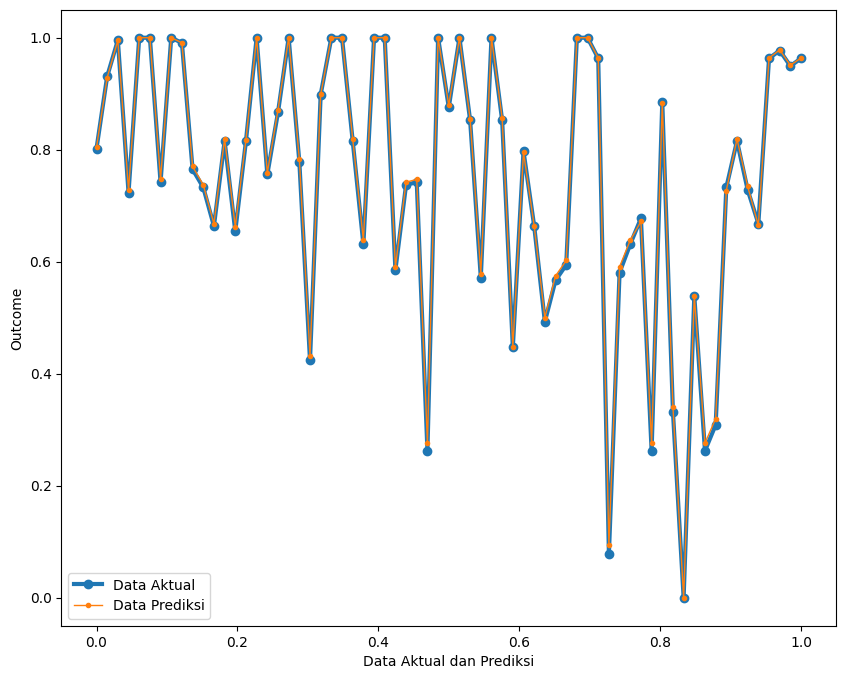

In [35]:
x = np.linspace(0, 1, 67) # berfungsi untuk menghitung nilai x
x = x/max(x) # berfungsi untuk menghitung nilai x
plt.figure(figsize=(10,8)) # berfungsi untuk mengatur ukuran gambar
plt.plot(x,ym, linewidth=3.0, marker='o', label='Data Aktual') # berfungsi untuk mengatur nilai x dan ym
plt.plot(x,y, linewidth=1.0, marker='.', label='Data Prediksi') # berfungsi untuk mengatur nilai x dan y
plt.legend(loc='best') # berfungsi untuk mengatur letak legenda
plt.ylabel('Outcome') # berfungsi untuk mengatur label sumbu y
plt.xlabel('Data Aktual dan Prediksi') # berfungsi untuk mengatur label sumbu x
plt.show() # berfungsi untuk menampilkan gambar

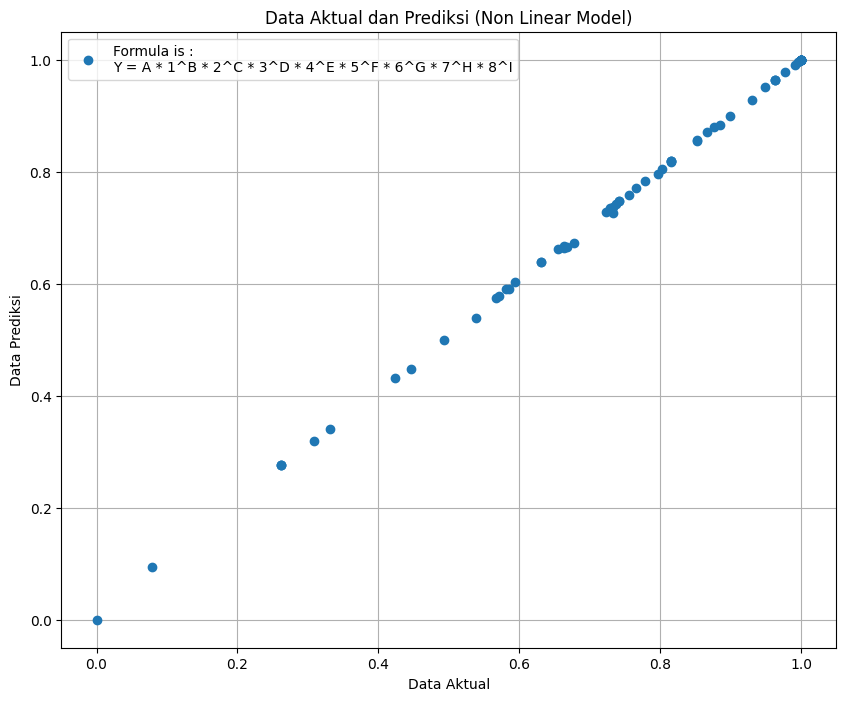

In [36]:
plt.figure(figsize=(10,8)) # berfungsi untuk mengatur ukuran gambar
plt.title('Data Aktual dan Prediksi (Non Linear Model)') # berfungsi untuk mengatur judul gambar
plt.plot(ym,y,'o') # berfungsi untuk mengatur nilai x dan y
plt.xlabel('Data Aktual') # berfungsi untuk mengatur label x 
plt.ylabel('Data Prediksi') # berfungsi untuk mengatur label y
plt.legend([cLegend]) # berfungsi untuk mengatur legenda
plt.grid(True) # berfungsi untuk mengatur grid
plt.show() # berfungsi untuk menampilkan gambar

In [37]:
final # berfungsi untuk menampilkan nilai final

,y_true,y_pred
0,94.63,94.510475
1,98.13,97.902856
2,99.88,99.707101
3,92.50,92.421639
4,100.00,99.834648
...,...,...
62,91.00,90.726226
63,99.00,98.852756
64,99.38,99.245401
65,98.63,98.501478


# 5. Evaluasi

In [38]:
def error(y_true, y_pred): # berfungsi untuk menghitung nilai error
    return y_true - y_pred # berfungsi untuk menghitung nilai error dengan rumus y_true - y_pred

def error2(y_true, y_pred): # berfungsi untuk menghitung nilai error2
    return (y_true - y_pred)**2 # berfungsi untuk menghitung nilai error2 dengan rumus (y_true - y_pred)^2



In [39]:
final['error'] = error(final['y_true'], final['y_pred']) # berfungsi untuk menghitung nilai error
final['error²'] = error2(final['y_true'], final['y_pred']) # berfungsi untuk menghitung nilai error2
total_error = final['error²'].sum() # berfungsi untuk menghitung nilai total error
display(final) # berfungsi untuk menampilkan nilai final



,y_true,y_pred,error,error²
0,94.63,94.510475,0.119525,0.014286
1,98.13,97.902856,0.227144,0.051595
2,99.88,99.707101,0.172899,0.029894
3,92.50,92.421639,0.078361,0.006140
4,100.00,99.834648,0.165352,0.027341
...,...,...,...,...
62,91.00,90.726226,0.273774,0.074952
63,99.00,98.852756,0.147244,0.021681
64,99.38,99.245401,0.134599,0.018117
65,98.63,98.501478,0.128522,0.016518


In [40]:
MSE = total_error / len(final) # berfungsi untuk menghitung nilai MSE dengan rumus total error dibagi dengan panjang final
RMSE = np.sqrt(MSE) # berfungsi untuk menghitung nilai RMSE dengan rumus akar kuadrat dari MSE
MAE = final['error'].abs().sum() / len(final) # berfungsi untuk menghitung nilai MAE dengan rumus total error absolut dibagi dengan panjang final
SE = final['error'].std() # berfungsi untuk menghitung nilai SE dengan rumus standar deviasi dari error
R2SCORE = 1 - (final['error²'].sum() / ((final['y_true'] - final['y_true'].mean())**2).sum()) # berfungsi untuk menghitung nilai R2SCORE dengan rumus 1 - (total error kuadrat dibagi dengan ((y_true - rata-rata y_true)^2).sum())

print('MSE      = ' + str(MSE)) # berfungsi untuk menampilkan nilai MSE
print('RMSE     = ' + str(RMSE)) # berfungsi untuk menampilkan nilai RMSE
print('MAE      = ' + str(MAE)) # berfungsi untuk menampilkan nilai MAE
print('SE       = ' + str(SE)) # berfungsi untuk menampilkan nilai SE
print('R2 SCORE = ' + str(R2SCORE)) # berfungsi untuk menampilkan nilai R2SCORE


MSE      = 0.020985240344601547
RMSE     = 0.1448628328613021
MAE      = 0.12391725296085078
SE       = 0.11269384025207152
R2 SCORE = 0.9995202005308449
